In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [453]:
file_path = "C:\\Users\\hp\\Downloads\\archive (2)\\housing.csv"
house = pd.read_csv(file_path)

In [454]:
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [455]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [456]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [457]:
house.dropna(inplace = True)

In [458]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [459]:
from sklearn.model_selection import train_test_split

x = house.drop(['median_house_value'],axis=1)
y = house['median_house_value']

In [460]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [461]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

# Training model

In [462]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) # 20% of the data is reserved only for evaluation

In [463]:
train_house = x_train.join(y_train)

In [464]:
train_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6654,-118.12,34.16,30.0,1762.0,416.0,940.0,398.0,2.8631,<1H OCEAN,188600.0
10223,-117.89,33.88,27.0,2091.0,336.0,1037.0,332.0,5.7519,<1H OCEAN,243400.0
9966,-122.40,38.46,33.0,2542.0,466.0,1099.0,420.0,4.6350,INLAND,248500.0
10318,-117.81,33.84,17.0,4343.0,515.0,1605.0,484.0,10.5981,<1H OCEAN,460100.0
4481,-118.18,34.06,27.0,2025.0,565.0,2189.0,577.0,2.6083,<1H OCEAN,148600.0
...,...,...,...,...,...,...,...,...,...,...
3907,-118.50,34.19,26.0,2156.0,509.0,1142.0,470.0,4.0000,<1H OCEAN,224700.0
15605,-116.80,32.80,11.0,3874.0,565.0,1672.0,546.0,6.1481,<1H OCEAN,274600.0
6119,-117.92,34.13,42.0,1762.0,398.0,1526.0,365.0,2.8643,INLAND,132600.0
6109,-117.88,34.12,36.0,2029.0,351.0,1327.0,364.0,4.1836,<1H OCEAN,164300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

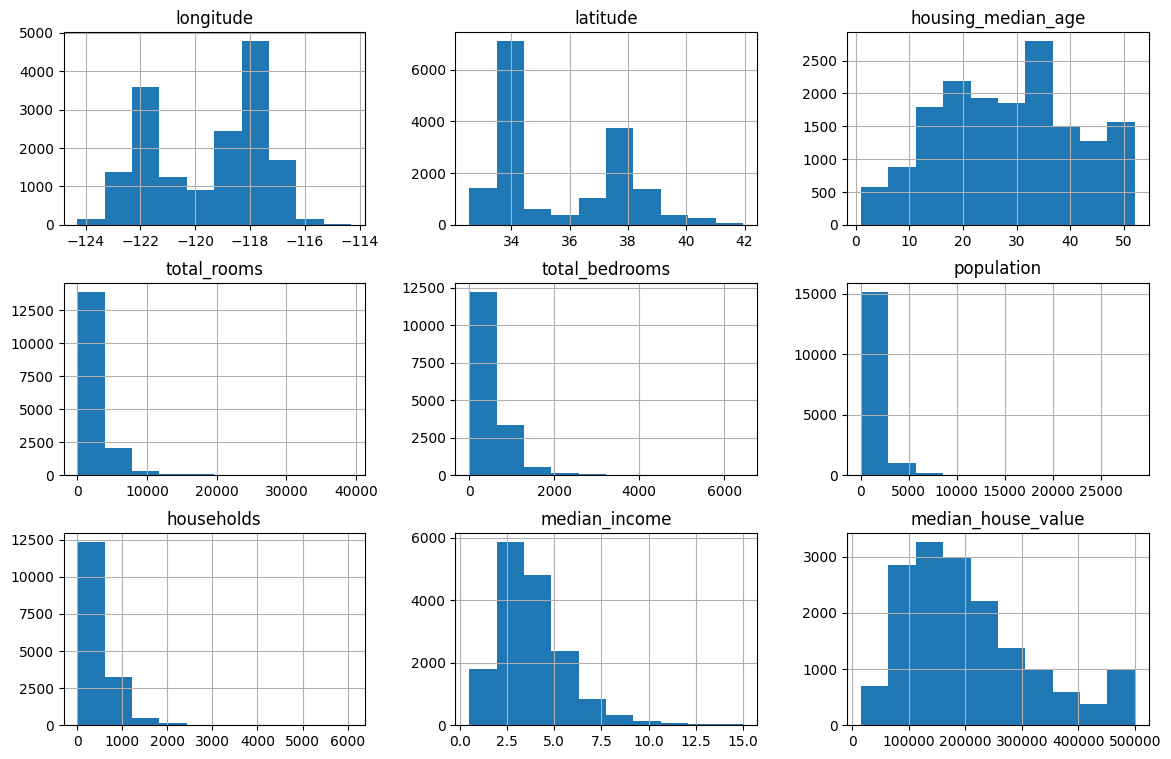

In [465]:
train_house.hist( figsize = (14,9))

# Data Processing 

In [466]:
train_house["total_rooms"] = np.log(train_house['total_rooms'] + 1)
train_house["total_bedroom"] = np.log(train_house['total_bedrooms'] + 1)
train_house["population"] = np.log(train_house['population'] + 1)
train_house["households"] = np.log(train_house['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'total_bedroom'}>, <Axes: >, <Axes: >]],
      dtype=object)

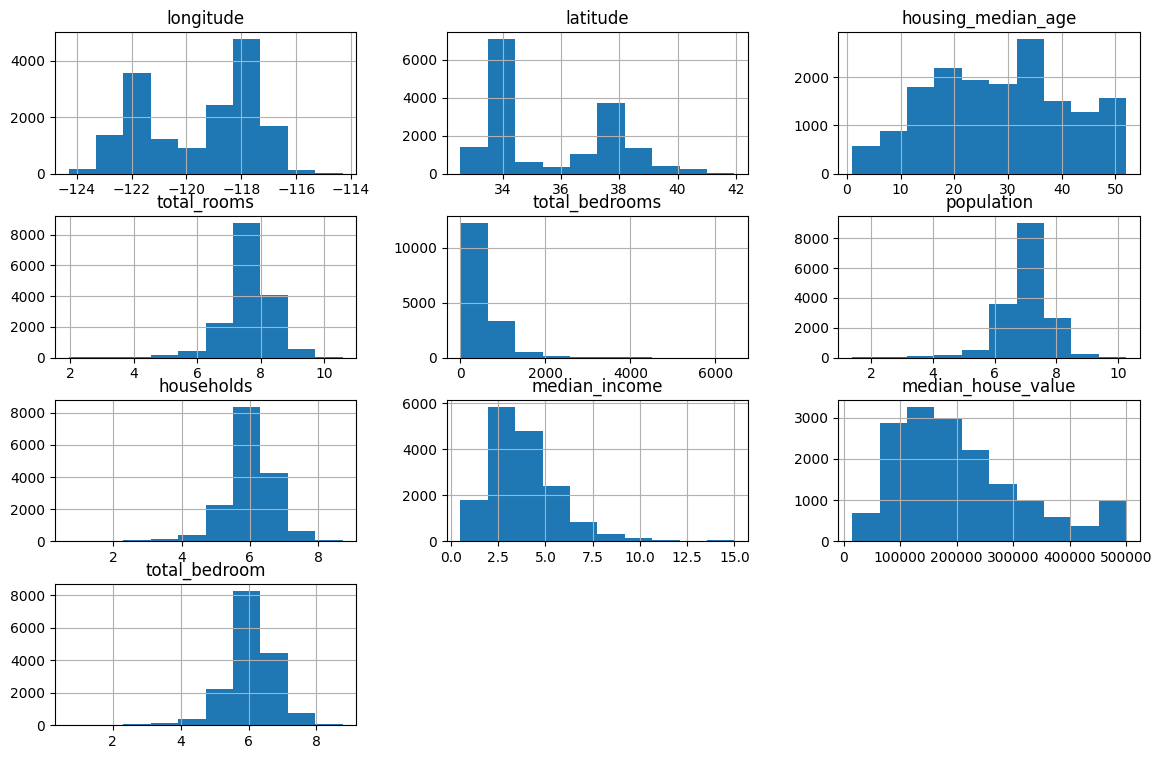

In [467]:
train_house.hist(figsize = (14,9))

In [468]:
train_house = train_house.join(pd.get_dummies(train_house.ocean_proximity)).drop(['ocean_proximity'],axis = 1)

In [469]:
train_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedroom,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6654,-118.12,34.16,30.0,7.474772,416.0,6.846943,5.988961,2.8631,188600.0,6.033086,True,False,False,False,False
10223,-117.89,33.88,27.0,7.645876,336.0,6.945051,5.808142,5.7519,243400.0,5.820083,True,False,False,False,False
9966,-122.40,38.46,33.0,7.841100,466.0,7.003065,6.042633,4.6350,248500.0,6.146329,False,True,False,False,False
10318,-117.81,33.84,17.0,8.376551,515.0,7.381502,6.184149,10.5981,460100.0,6.246107,True,False,False,False,False
4481,-118.18,34.06,27.0,7.613819,565.0,7.691657,6.359574,2.6083,148600.0,6.338594,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,-118.50,34.19,26.0,7.676474,509.0,7.041412,6.154858,4.0000,224700.0,6.234411,True,False,False,False,False
15605,-116.80,32.80,11.0,8.262301,565.0,7.422374,6.304449,6.1481,274600.0,6.338594,True,False,False,False,False
6119,-117.92,34.13,42.0,7.474772,398.0,7.331060,5.902633,2.8643,132600.0,5.988961,False,True,False,False,False
6109,-117.88,34.12,36.0,7.615791,351.0,7.191429,5.899897,4.1836,164300.0,5.863631,True,False,False,False,False


<Axes: >

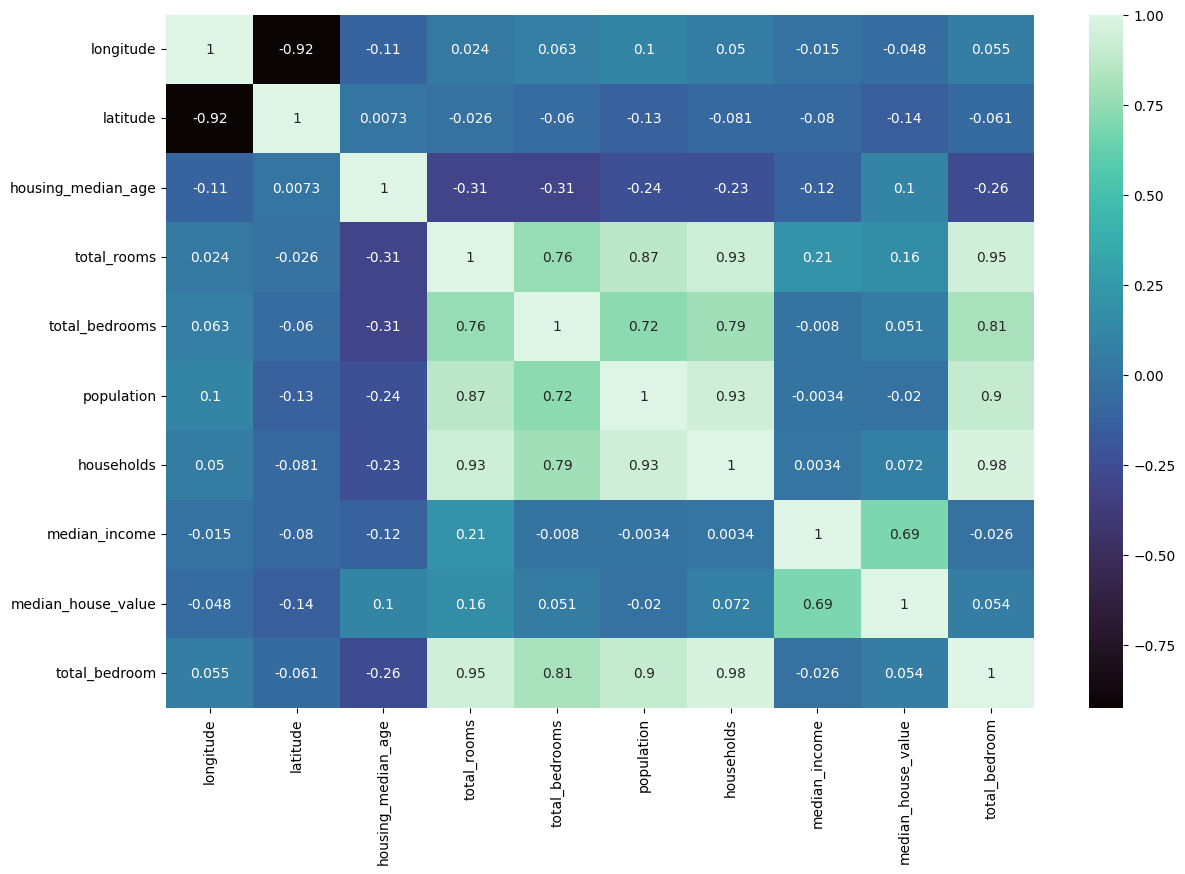

In [470]:
numeric_columns = train_house.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrix , annot=True, cmap="mako")

<Axes: xlabel='latitude', ylabel='longitude'>

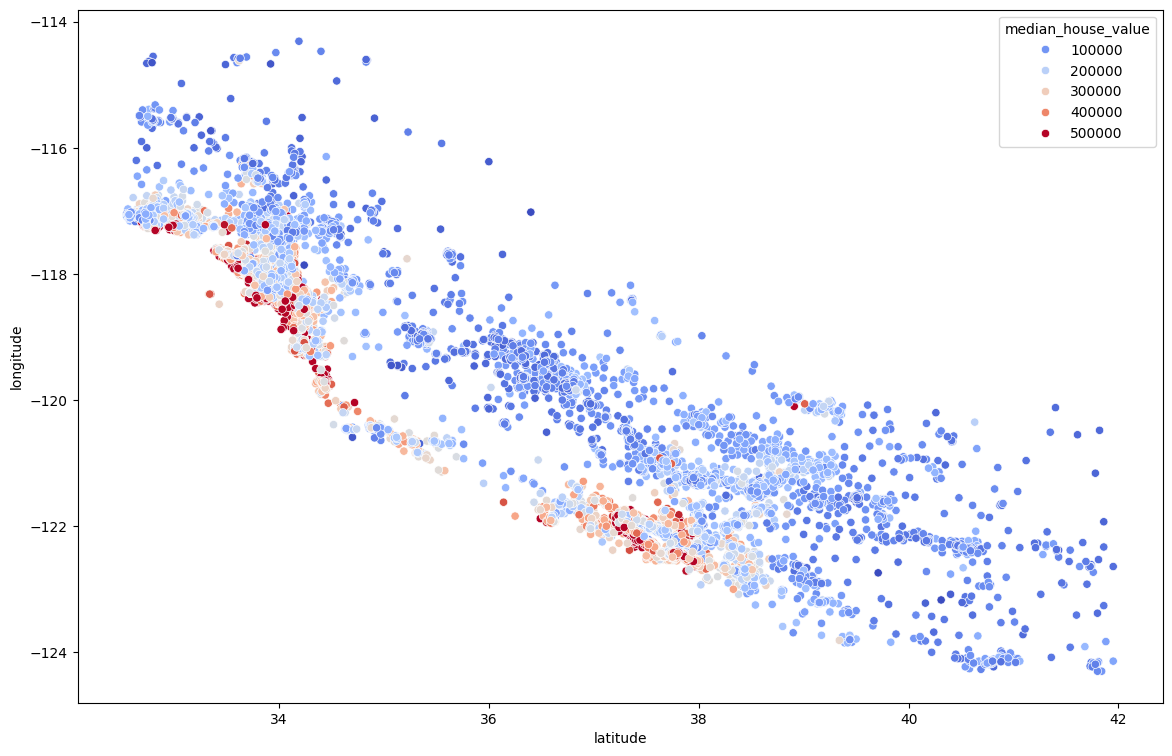

In [471]:
plt.figure(figsize = (14,9))
sns.scatterplot(x = "latitude", y="longitude", data = train_house, hue ="median_house_value", palette = "coolwarm")

In [472]:
train_house['bedroom_ratio'] = train_house['total_bedrooms'] / train_house['total_rooms']
train_house['household_rooms'] = train_house['total_rooms'] / train_house['households']

<Axes: >

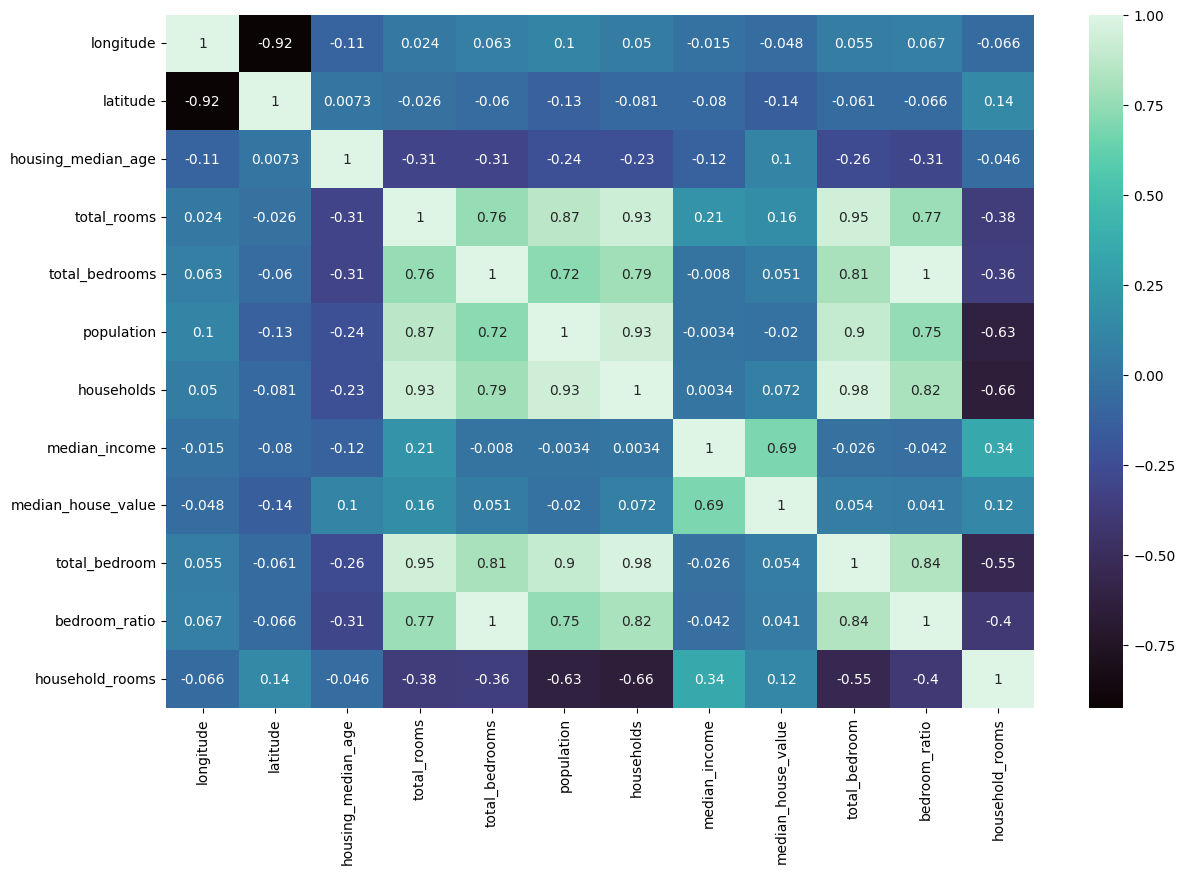

In [473]:
numeric_columns = train_house.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrix , annot=True, cmap="mako")

# Linear Regession Model 

In [474]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,  FunctionTransformer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

x_train, y_train = train_house.drop(['median_house_value'], axis=1), train_house['median_house_value']

reg = LinearRegression()

reg.fit(x_train , y_train)

LinearRegression()

In [475]:
test_house = x_test.join(y_test)

test_house["total_rooms"] = np.log(test_house['total_rooms'] + 1)
test_house["total_bedroom"] = np.log(test_house['total_bedrooms'] + 1)
test_house["population"] = np.log(test_house['population'] + 1)
test_house["households"] = np.log(test_house['households'] + 1)

test_house = test_house.join(pd.get_dummies(test_house.ocean_proximity)).drop(['ocean_proximity'],axis = 1)

test_house['bedroom_ratio'] = test_house['total_bedrooms'] / test_house['total_rooms']
test_house['household_rooms'] = test_house['total_rooms'] / test_house['households']

In [476]:
x_test, y_test = test_house.drop(['median_house_value'], axis=1), test_house['median_house_value']

In [477]:
reg.score(x_test , y_test)

0.6722490285887572

In [478]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
mse_scores = []  # List to store MSE scores

for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

   
    reg.fit(x_train_fold, y_train_fold)
    y_pred = reg.predict(x_val_fold)

    mse = mean_squared_error(y_val_fold, y_pred)
    mse_scores.append(mse)

# Calculate the mean of the MSE scores across all folds
mean_mse = np.mean(mse_scores)
print("Mean Squared Error (Cross-Validated):", mean_mse)

Mean Squared Error (Cross-Validated): 4379044497.738104


In [479]:
predictions = reg.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4422299120.168205
